합성곱 신경망(1)
=============

나만의 CNN으로 MNIST 예측하기
---------------------------------------------

### 휴먼지능정보공학과 201810800 이혜인

## [GitHub url] : https://github.com/hyeinlee725/Deep_Learning_2020
### 추후에 차근차근 올릴 예정

## Load packages

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

## MNIST train, test dataset 가져오기

In [4]:
# "": 현재 폴데어 MNIST 있음
mnist_train = dset.MNIST("", train=True, transform=transforms.ToTensor(),
                        target_transform=None, download=True) # train 용으로 쓰겠다.
mnist_test = dset.MNIST("", train=False, transform=transforms.ToTensor(),
                       target_transform=None, download=True) # test 용으로 쓰겠다.

## 대략적인 데이터 형태

mnist_train 길이: 60000
mnist_test 길이: 10000
image data 형태: torch.Size([1, 28, 28])
label:  5


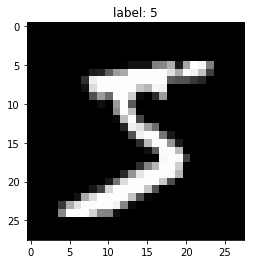

In [5]:
print "mnist_train 길이:", len(mnist_train)
print "mnist_test 길이:", len(mnist_test)

# 데이터 하나 형태
image, label = mnist_train.__getitem__(0) # 0번째 데이터
print "image data 형태:", image.size()
print "label: ", label

# 그리기
img = image.numpy() # image 타입을 numpy 로 변환 (1, 28, 28)
plt.title("label: %d" %label)
plt.imshow(img[0], cmap='gray')
plt.show()

## MNIST data 띄워보기

5
torch.Size([1, 28, 28])
5


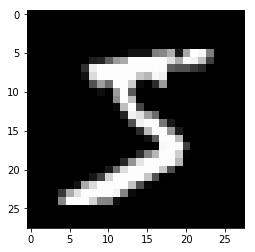

0


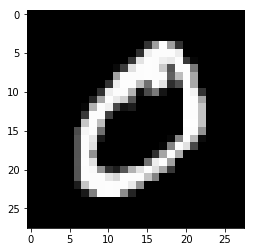

4


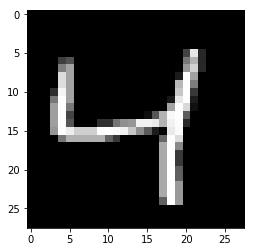

In [8]:
print(mnist_train[0][1]) # label
print(mnist_train[0][0].size()) # image

for i in range(3):
    img = mnist_train[i][0].numpy()
    print(mnist_train[i][1])
    plt.imshow(img[0], cmap='gray')
    plt.show()

## convolution 하나 씌워보기

torch.Size([1, 1, 28, 28])
5
torch.Size([1, 3, 28, 28])


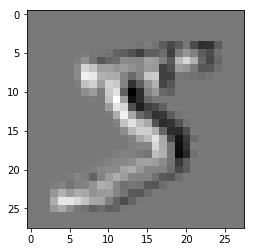

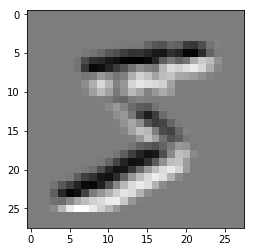

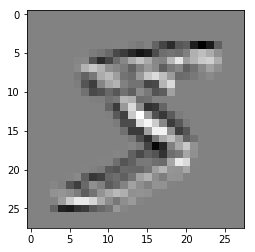

In [10]:
# mnist의 첫 번째 이미지, 라벨 가져오기
image, label = mnist_train[0]
# view : tensor의 사이즈 조절. -1 : 해당 차원 차원을 확장시켜라
# [1, 28, 28] -> [1, 1, 28, 28]
image = image.view(-1, image.size()[0], image.size()[1], image.size()[2])
print(image.size())

print label

# convolutional filter 정의
conv_layer=nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
# image에 filter 적용
output=conv_layer(Variable(image))
print(output.size())

for i in range(3):
    plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
    plt.show()

## CNN 만들기
### train, test data 가져오기

In [13]:
import numpy as np
import torch.optim as optim

batch_size = 16
learning_rate = 0.0002
num_epoch = 10 # 1000

In [14]:
# 후에 학습시킬 때 batch_size 단위로 학습시켜나감
train_loader = torch.utils.data.DataLoader(list(mnist_train)[:batch_size*100], batch_size=batch_size, # mnisst_train을 트레인 시켜라
                                               shuffle=True, num_workers=2,
                                               drop_last=True) # batch_size만큼 나눌 때 나머지는 버려라
test_loader = torch.utils.data.DataLoader((mnist_test), batch_size=batch_size,
                                         shuffle=False, num_workers=2,
                                         drop_last=True)

## CNN 클래스 만들기 (모델 만들기)

In [15]:
class CNN(nn.Module): #nn.Module 상속받음
    def __init__(self):
        super(CNN, self).__init__() # 28 x 28
        self.layer=nn.Sequential(
            nn.Conv2d(1, 16, 5, padding=2),
            nn.ReLU(),
        
            nn.Conv2d(16, 32, 5, padding=2),# 28 x 28
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 28 x 28 -> 14 x 14
        
            nn.Conv2d(32, 64, 5, padding=2), # 14 x 14
            nn.ReLU(),
            nn.MaxPool2d(2,2) # 14 x 14 -> 7 x 7
        )
        self.fc_layer=nn.Sequential(
            nn.Linear(64*7*7, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
    def forward(self, x):
        out = self.layer(x)
        out = out.view(batch_size, -1)
        out = self.fc_layer(out)
        return out
    
model = CNN().cuda()

In [19]:
# 파라미터 체크하기(전부)
for parameter in model.parameters():
    print(parameter)
    print(parameter.shape)

Parameter containing:
tensor([[[[-0.1398, -0.0550, -0.1169, -0.1508,  0.1884],
          [ 0.0869, -0.1711, -0.1252,  0.1052,  0.1613],
          [-0.1583,  0.1983, -0.0903,  0.0406,  0.0279],
          [-0.1009,  0.1908, -0.0337, -0.1584, -0.0482],
          [ 0.1067,  0.0506, -0.1198, -0.1438, -0.1782]]],


        [[[ 0.0956, -0.0026,  0.1218, -0.1703,  0.1367],
          [ 0.0459, -0.1394,  0.1257, -0.1724, -0.1691],
          [-0.1957,  0.1898,  0.0500,  0.1335,  0.1028],
          [-0.1419, -0.0910,  0.0039,  0.0655, -0.0590],
          [-0.0541,  0.0554, -0.1436,  0.0601, -0.1022]]],


        [[[-0.0069, -0.0003, -0.1642, -0.0270, -0.0706],
          [-0.0271,  0.0082, -0.0859, -0.0879, -0.0361],
          [ 0.1239,  0.1547,  0.1360,  0.0632, -0.0446],
          [ 0.0536, -0.1888,  0.0303,  0.1142,  0.1704],
          [-0.0480,  0.0828, -0.1841, -0.0757,  0.0003]]],


        [[[-0.0874,  0.0583,  0.0124, -0.0569,  0.1383],
          [-0.0174, -0.0433, -0.1475,  0.1568, -0.1686

In [20]:
# 파라미터 체크하기 (shape만!)
for parameter in model.parameters():
    #print(parameter)
    print(parameter.shape)

torch.Size([16, 1, 5, 5])
torch.Size([16])
torch.Size([32, 16, 5, 5])
torch.Size([32])
torch.Size([64, 32, 5, 5])
torch.Size([64])
torch.Size([100, 3136])
torch.Size([100])
torch.Size([10, 100])
torch.Size([10])


In [21]:
# loss function, optimizer 선언
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## optimization

In [22]:
for i in range(num_epoch):
    for j, [image, label] in enumerate(train_loader): # batch_size 만큼
        x = Variable(image).cuda()
        y_ = Variable(label).cuda()
        
        optimizer.zero_grad() #optimizer 안에서 이전 gradient 들을 초기화
        output=model.forward(x)
        loss = loss_func(output, y_)
        loss.backward() # gradient 계산
        optimizer.step() # patameter 업데이트
        
        if j%50==0:
            print(loss, j, i)

(tensor(2.3109, device='cuda:0', grad_fn=<NllLossBackward>), 0, 0)
(tensor(1.9487, device='cuda:0', grad_fn=<NllLossBackward>), 50, 0)
(tensor(0.5262, device='cuda:0', grad_fn=<NllLossBackward>), 0, 1)
(tensor(0.8498, device='cuda:0', grad_fn=<NllLossBackward>), 50, 1)
(tensor(0.3618, device='cuda:0', grad_fn=<NllLossBackward>), 0, 2)
(tensor(0.6217, device='cuda:0', grad_fn=<NllLossBackward>), 50, 2)
(tensor(0.0700, device='cuda:0', grad_fn=<NllLossBackward>), 0, 3)
(tensor(0.6403, device='cuda:0', grad_fn=<NllLossBackward>), 50, 3)
(tensor(0.1211, device='cuda:0', grad_fn=<NllLossBackward>), 0, 4)
(tensor(0.0206, device='cuda:0', grad_fn=<NllLossBackward>), 50, 4)
(tensor(0.1138, device='cuda:0', grad_fn=<NllLossBackward>), 0, 5)
(tensor(0.0921, device='cuda:0', grad_fn=<NllLossBackward>), 50, 5)
(tensor(0.2689, device='cuda:0', grad_fn=<NllLossBackward>), 0, 6)
(tensor(0.1395, device='cuda:0', grad_fn=<NllLossBackward>), 50, 6)
(tensor(0.0204, device='cuda:0', grad_fn=<NllLossBackwa

In [23]:
# 모델 저장시키기
torch.save(model, 'nets/mycnn_model_%d.pkl' %(num_epoch))

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CNN. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [24]:
try:
    # 미리 학습시킨 네트워크의 파라미터 집합 [피클]이라 발음함.
    model=torch.load('nets/mycnn_model_10.pkl')
    print("model restored")
except:
    print("model not restored")

model restored


In [29]:
def ComputeAccr(dloader, imodel):
    correct = 0
    total = 0
    
    for j, [imgs, labels] in enumerate(dloader): # batch_size 만큼
        img = Variable(imgs).cuda() # x
        label = Variable(labels).cuda() # y
        #.cuda() : GPU에 로드되기 위함. 만약 CPU로 설정되어 있다면 에러남
        
        output = imodel.forward(img) # forward prop.
        _, output_index = torch.max(output, 1)
        
        total += label.size(0)
        correct += (output_index == label).sum().float()
    print("Accuracy of Test Data: {}".format(100*correct/total))

In [30]:
ComputeAccr(test_loader, model)

Accuracy of Test Data: 94.4199981689
